# Isolation_Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv("data/kddcup.data.corrected", sep=",", names=columns, index_col=None)

In [3]:
df.shape

(4898431, 42)

In [4]:
df = df[df['service'] == 'http']
df.drop('service', axis=1)
columns.remove('service')

In [5]:
df.shape

(623091, 42)

In [6]:
df['label'].value_counts()

normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(df[col])
        df[col] = encoded.transform(df[col])

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,9,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,0,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
2,0,0,0,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
3,0,0,0,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
4,0,0,0,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4


In [10]:
for f in range(0, 3):
    df = df.iloc[np.random.permutation(len(df))]

df2 = df[:500000]

labels = df2['label']

df_validate = df[500000:]

X_train, X_test, y_train, y_test = train_test_split(df2, labels, test_size=0.2, random_state=42)

X_val, y_val = df_validate, df_validate['label']

In [11]:
print('Shapes:\nX_train:%s\ny_train:%s\n' % (X_train.shape, y_train.shape))
print('X_test:%s\ny_test:%s\n' % (X_test.shape, y_test.shape))
print('X_val:%s\ny_val:%s\n' % (X_val.shape, y_val.shape))

Shapes:
X_train:(400000, 42)
y_train:(400000,)

X_test:(100000, 42)
y_test:(100000,)

X_val:(123091, 42)
y_val:(123091,)



In [12]:
isolation_forest = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1, random_state=42)

In [13]:
isolation_forest.fit(X_train)

IsolationForest(contamination=0.1, max_samples=256, random_state=42)

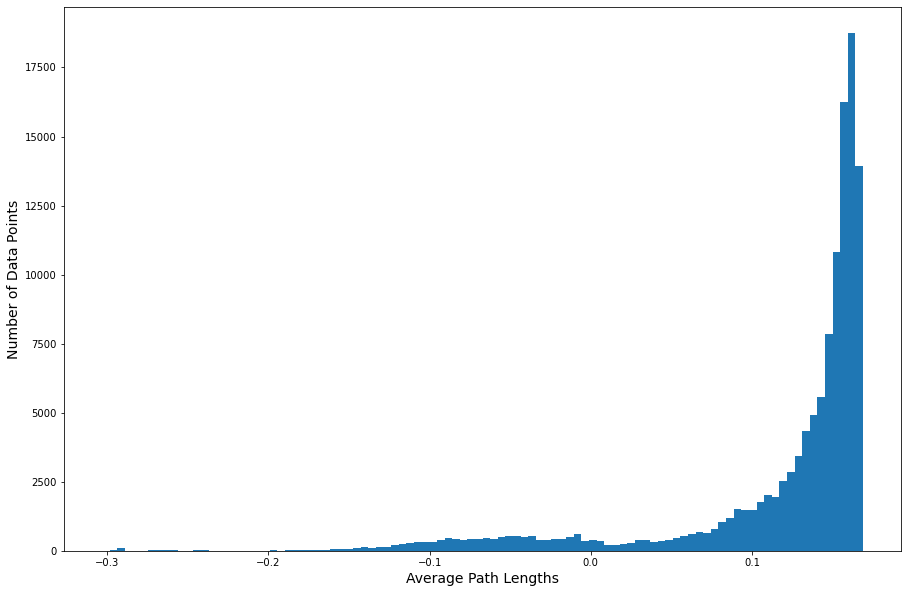

In [14]:
anormaly_scores = isolation_forest.decision_function(X_val)
plt.figure(figsize=(15, 10))
plt.hist(anormaly_scores, bins = 100)
plt.xlabel('Average Path Lengths', fontsize = 14)
plt.ylabel('Number of Data Points', fontsize = 14)
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

anomalies = anormaly_scores > -0.19
matches = y_val == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies, matches)
print('AUC: {:.2%}'.format(auc))

AUC: 96.88%


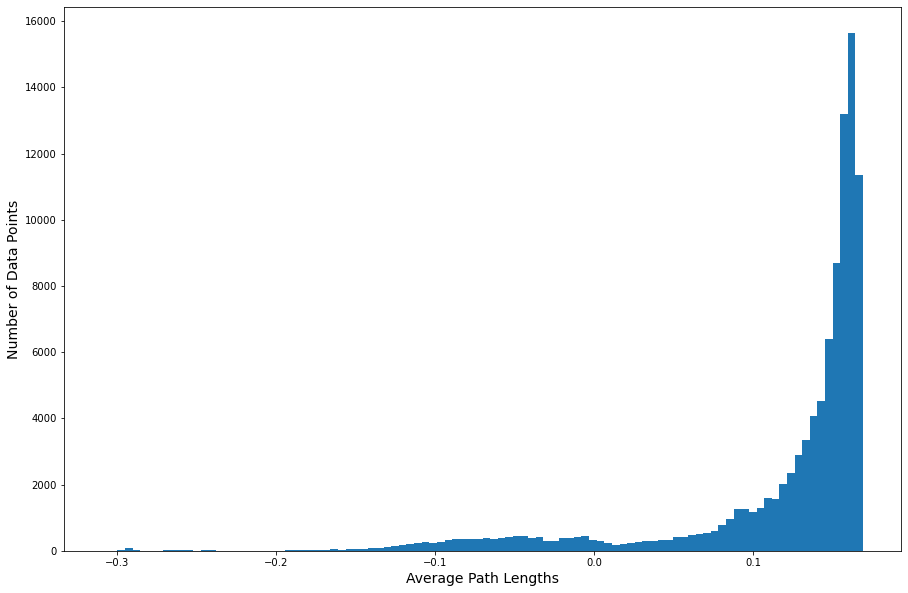

In [16]:
anormaly_scores_test = isolation_forest.decision_function(X_test)
plt.figure(figsize=(15, 10))
plt.hist(anormaly_scores_test, bins = 100)
plt.xlabel('Average Path Lengths', fontsize = 14)
plt.ylabel('Number of Data Points', fontsize = 14)
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score

anomalies_test = anormaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index('normal.')
auc = roc_auc_score(anomalies_test, matches)
print('AUC: {:.2%}'.format(auc))

AUC: 95.79%


# One-Class Support Vector Machine

In [18]:
from sklearn.svm import OneClassSVM

In [19]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv("data/kddcup.data.corrected", sep=",", names=columns, index_col=None)

In [20]:
df = df[df['service'] == 'http']
df = df.drop('service', axis=1)
columns.remove('service')

In [21]:
novelties = df[df['label'] != 'normal.']
novelties_normal = df[150000:154045]

In [22]:
novelties = pd.concat([novelties, novelties_normal])
normal = df[df['label'] == 'normal.']

In [23]:
novelties.shape

(8090, 41)

In [24]:
normal.shape

(619046, 41)

In [25]:
for col in normal.columns:
    if normal[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(normal[col])
        normal[col] = encoded.transform(normal[col])

C:\Users\User\AppData\Local\Temp/ipykernel_25300/1390962516.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal[col] = encoded.transform(normal[col])


In [26]:
for col in novelties.columns:
    if novelties[col].dtype == 'object':
        encoded2 = LabelEncoder()
        encoded2.fit(novelties[col])
        novelties[col] = encoded2.transform(novelties[col])

In [27]:
for f in range(0, 10):
    normal = normal.iloc[np.random.permutation(len(normal))]

In [28]:
df2 = pd.concat([normal[:100000], normal[200000:250000]])
df_validate = normal[100000:150000]
X_train, X_test = train_test_split(df2, test_size=0.2, random_state=42)
X_val = df_validate

In [29]:
print(f'Shapes:\nX_train: {X_train.shape}\n')
print(f'X_test:{X_test.shape}\n')
print(f'X_val:{X_val.shape}')

Shapes:
X_train: (120000, 41)

X_test:(30000, 41)

X_val:(50000, 41)


In [30]:
ocsvm = OneClassSVM(kernel='rbf', gamma=0.00005, nu=0.1)

In [31]:
ocsvm.fit(X_train)

OneClassSVM(gamma=5e-05, nu=0.1)

In [32]:
preds = ocsvm.predict(X_test)
score = 0
for f in range(0, X_test.shape[0]):
    if(preds[f] == 1):
        score = score + 1

accuracy = score/ X_test.shape[0]
print('Accuracy: {:.2%}'.format(accuracy))

Accuracy: 89.91%


In [33]:
preds = ocsvm.predict(X_val)
score = 0
for f in range(0, X_val.shape[0]):
    if(preds[f] == 1):
        score = score + 1

accuracy = score/ X_val.shape[0]
print('Accuracy: {:.2%}'.format(accuracy))

Accuracy: 89.65%


In [34]:
preds = ocsvm.predict(novelties)
matches = novelties['label'] == 4

auc = roc_auc_score(preds, matches)
print('AUC: {:.2%}'.format(auc))

AUC: 95.91%


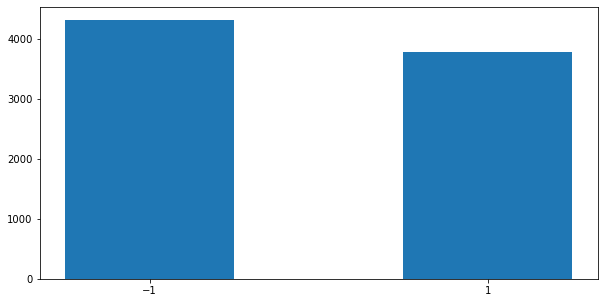

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(preds, bins=[-1.5, -0.5] + [0.5, 1.5], align='mid')
plt.xticks([-1, 1])
plt.show()